# Use different databases for the training and compare results

## import libs

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## load and prepare data

In [2]:
## grid sampling 1296
data1296 = pd.read_csv('CLEANED_gridsearch_1296.csv')
data1296 = data1296.drop(data1296.columns[0], axis=1)
X_1296 = data1296.drop('density', axis=1)
Y_1296 = data1296['density']
#print(f'{data1296}')
#print(f'{X_1296}')
#print(f'{Y_1296}')

## grid sampling 2401
data2401 = pd.read_csv('CLEANED_gridsearch_2401.csv')
data2401 = data2401.drop(data2401.columns[0], axis=1)
X_2401 = data2401.drop('density', axis=1)
Y_2401 = data2401['density']
#print(f'{data2401}')
#print(f'{X_2401}')
#print(f'{Y_2401}')

## sobol sampling
data_sobol = pd.read_csv('CLEANED_sobolsampling-2048.csv')
data_sobol = data_sobol.drop(data_sobol.columns[0], axis=1)
X_sobol = data_sobol.drop('density', axis=1)
Y_sobol = data_sobol['density']
#print(f'{data_sobol}')
#print(f'{X_sobol}')
#print(f'{Y_sobol}')


## random integer
taken from another script

In [3]:
random_ints = [46, 40, 23, 29, 14, 78, 55, 33, 1, 61, 62, 39, 9, 25, 96, 95, 28, 27, 51, 0, 4, 39, 12, 41, 94, 70, 50, 18, 77, 37]
#print(f'{np.sort(random_ints)}')

## split data by using different random states

In [4]:
## grid sampling 1296
X_TRAINs1296 = []
X_TESTs1296 = []
Y_TRAINs1296 = []
Y_TESTs1296 = []

## grid sampling 2401
X_TRAINs2401 = []
X_TESTs2401 = []
Y_TRAINs2401 = []
Y_TESTs2401 = []

## sobol sampling
X_TRAINsSobol = []
X_TESTsSobol = []
Y_TRAINsSobol = []
Y_TESTsSobol = []

for i in random_ints:
    #print(f'{i}')
    ## use the X_test, Y_test data for testing combined with all the data of the other datasets
    X_train, X_test, Y_train, Y_test = train_test_split(X_1296, Y_1296, test_size=0.05, random_state=i)
    X_TRAINs1296.append(X_train)
    Y_TRAINs1296.append(Y_train)
    #print(f'{X_test}')
    #print(f'{Y_test}')
    X_test = pd.concat([X_test, X_2401, X_sobol], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_2401, Y_sobol], ignore_index=True)
    X_TESTs1296.append(X_test)
    Y_TESTs1296.append(Y_test)
    #print(f'{X_test}')
    #print(f'{Y_test}')

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_2401, Y_2401, test_size=0.05, random_state=i)
    X_TRAINs2401.append(X_train),
    Y_TRAINs2401.append(Y_train)

    X_test = pd.concat([X_test, X_1296, X_sobol], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_sobol], ignore_index=True)
    X_TESTs2401.append(X_test)
    Y_TESTs2401.append(Y_test)

    
    X_train, X_test, Y_train, Y_test = train_test_split(X_sobol, Y_sobol, test_size=0.05, random_state=i)
    X_TRAINsSobol.append(X_train)
    Y_TRAINsSobol.append(Y_train)

    X_test = pd.concat([X_test, X_1296, X_2401], ignore_index=True)
    Y_test = pd.concat([Y_test, Y_1296, Y_2401], ignore_index=True)
    X_TESTsSobol.append(X_test)
    Y_TESTsSobol.append(Y_test)

    

## create and train models

In [14]:
## grid sampling 1296
MODELs1296 = []
Y_PREDICTIONs1296 = []
RMSEs1296 = []
R2s1296 = []
SPEARMANRs1296 = []

## grid sampling 2401
MODELs2401 = []
Y_PREDICTIONs2401 = []
RMSEs2401 = []
R2s2401 = []
SPEARMANRs2401 = []

## sobol sampling
MODELsSobol = []
Y_PREDICTIONsSobol = []
RMSEsSobol = []
R2sSobol = []
SPEARMANRsSobol = []

for i in range(0, len(random_ints)):
    ## creation of the pipeline
    model1296 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    model2401 = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
    #
    modelSobol = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())

    ## train/fit the model
    model1296.fit(X_TRAINs1296[i], Y_TRAINs1296[i])
    MODELs1296.append(model1296)
    #
    model2401.fit(X_TRAINs2401[i], Y_TRAINs2401[i])
    MODELs2401.append(model2401)
    #
    modelSobol.fit(X_TRAINsSobol[i], Y_TRAINsSobol[i])
    MODELsSobol.append(modelSobol)
    
    ## prediction using the test set
    Y_prediction1296 = model1296.predict(X_TESTs1296[i])
    Y_PREDICTIONs1296.append(Y_prediction1296)
    #
    Y_prediction2401 = model2401.predict(X_TESTs2401[i])
    Y_PREDICTIONs2401.append(Y_prediction2401)
    #
    Y_predictionSobol = modelSobol.predict(X_TESTsSobol[i])
    Y_PREDICTIONsSobol.append(Y_predictionSobol)
    
    ## evaluate with Y_test
    rmse1296 = np.sqrt(mean_squared_error(Y_TESTs1296[i], Y_prediction1296))
    r21296 = r2_score(Y_TESTs1296[i], Y_prediction1296)
    spearman_r1296 = stats.spearmanr(Y_TESTs1296[i], Y_prediction1296)
    RMSEs1296.append(rmse1296)
    R2s1296.append(r21296)
    SPEARMANRs1296.append(spearman_r1296.statistic)
    #
    rmse2401 = np.sqrt(mean_squared_error(Y_TESTs2401[i], Y_prediction2401))
    r22401 = r2_score(Y_TESTs2401[i], Y_prediction2401)
    spearman_r2401 = stats.spearmanr(Y_TESTs2401[i], Y_prediction2401)
    RMSEs2401.append(rmse2401)
    R2s2401.append(r22401)
    SPEARMANRs2401.append(spearman_r2401.statistic)
    #
    rmseSobol = np.sqrt(mean_squared_error(Y_TESTsSobol[i], Y_predictionSobol))
    r2Sobol = r2_score(Y_TESTsSobol[i], Y_predictionSobol)
    spearman_rSobol = stats.spearmanr(Y_TESTsSobol[i], Y_predictionSobol)
    RMSEsSobol.append(rmseSobol)
    R2sSobol.append(r2Sobol)
    SPEARMANRsSobol.append(spearman_rSobol.statistic)


## Plot RMSEs and R2s

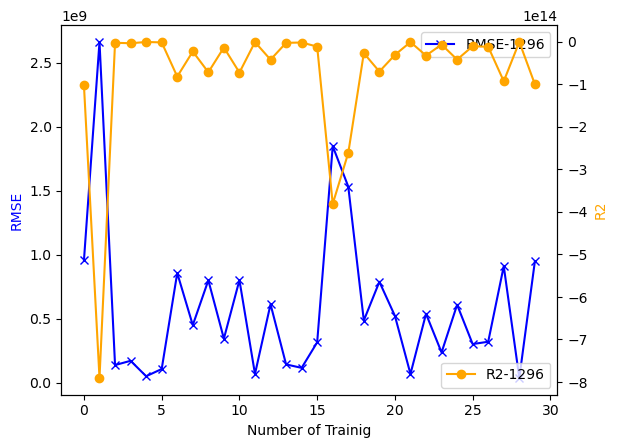

In [7]:
## Grid Sampling 1296
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296, '-x', color='blue', label='RMSE-1296')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s1296, '-o', color='orange', label='R2-1296')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('GRID1296-Training_with_different_randomseeds_for_data_splits.png')

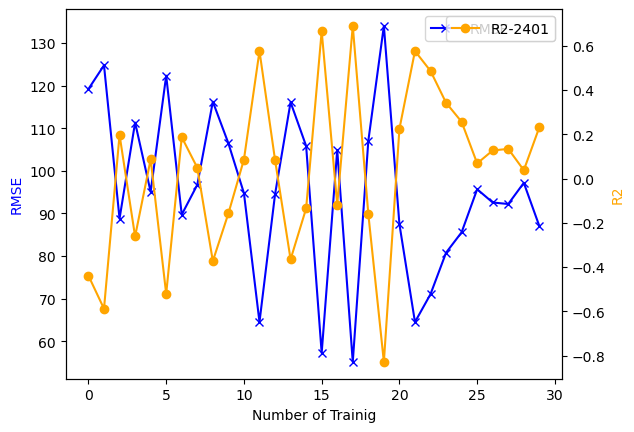

In [8]:
## Grid Sampling 2401
fig, ax1 = plt.subplots()
ax1.plot(RMSEs2401, '-x', color='blue', label='RMSE-2401')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s2401, '-o', color='orange', label='R2-2401')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('GRID2401-Training_with_different_randomseeds_for_data_splits.png')

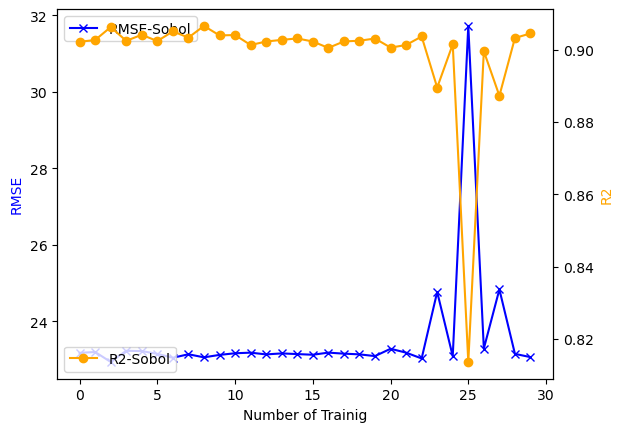

In [9]:
## Sobol Sampling
fig, ax1 = plt.subplots()
ax1.plot(RMSEsSobol, '-x', color='blue', label='RMSE-Sobol')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2sSobol, '-o', color='orange', label='R2-Sobol')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('Sobol-Training_with_different_randomseeds_for_data_splits.png')

## means of RMSE and R2 and SpearmanR

In [16]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
print(f'avg. RMSE: {np.mean(RMSEs1296)}')
print(f'Std Dev: {np.std(RMSEs1296)}')
#print(f'Variance: {np.var(RMSEs1296)}')
print(f'avg. R2: {np.mean(R2s1296)}')
print(f'Std Dev: {np.std(R2s1296)}')
#print(f'Variance: {np.var(R2s1296)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs1296)}')
print(f'Std Dev: {np.std(SPEARMANRs1296)}')

print(f'\nGRID SAMPLE 2401')
print(f'avg. RMSE: {np.mean(RMSEs2401)}')
print(f'Std Dev: {np.std(RMSEs2401)}')
#print(f'Variance: {np.var(RMSEs2401)}')
print(f'avg. R2: {np.mean(R2s2401)}')
print(f'Std Dev: {np.std(R2s2401)}')
#print(f'Variance: {np.var(R2s2401)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRs2401)}')
print(f'Std Dev: {np.std(SPEARMANRs2401)}')

print(f'\nSobol Sampling')
print(f'avg. RMSE: {np.mean(RMSEsSobol)}')
print(f'Std Dev: {np.std(RMSEsSobol)}')
#print(f'Variance: {np.var(RMSEsSobol)}')
print(f'avg. R2: {np.mean(R2sSobol)}')
print(f'Std Dev: {np.std(R2sSobol)}')
#print(f'Variance: {np.var(R2sSobol)}')
print(f'avg. SpearmanR: {np.mean(SPEARMANRsSobol)}')
print(f'Std Dev: {np.std(SPEARMANRsSobol)}')

GRID SAMPLE 1296
avg. RMSE: 592402258.4928082
Std Dev: 576109161.4696513
avg. R2: -76095197482620.14
Std Dev: 155194983542051.8
avg. SpearmanR: 0.0013508630408429845
Std Dev: 0.004474579576786921

GRID SAMPLE 2401
avg. RMSE: 95.30139883623964
Std Dev: 19.438741208248782
avg. R2: 0.03876817816254321
Std Dev: 0.37070921852193545
avg. SpearmanR: 0.7874863106657872
Std Dev: 0.06211722018022256

Sobol Sampling
avg. RMSE: 23.535398635274568
Std Dev: 1.5776871609280352
avg. R2: 0.8989296630991017
Std Dev: 0.01632400964622871
avg. SpearmanR: 0.9600236633131214
Std Dev: 0.011181555123092131


## NOTES:
use all other data except the data used for training for testing (not only the 5%)

Grid Sample 1296:
- really bad extrapolation, since the RMSE/R2 is really bad, when Grid2401 and Sobol are used for testing. Grid2401/Sobol are "larger" than Grid1296

Sobol Sampling is good and better than Grid2401

# END HERE, Does not need to be tested again
# NOTE: Tested database reduction to check if extrapolation does not work well
does not need to be updated anymore. The overall model is not that good and also interpolation does not work well

## remove datapoints outside of Grid2401/Sobol that are outside of Grid1296 and retest
idea: check if bad performance is only due to extraploation

In [82]:
X_2401_red = X_2401
Y_2401_red = Y_2401
#
X_sobol_red = X_sobol
Y_sobol_red = Y_sobol

min_sigc_1296 = min(X_1296["SigC"])
max_sigc_1296 = max(X_1296["SigC"])
#print(f'{min_sigc_1296}')
#print(f'{max_sigc_1296}')
min_sigh_1296 = min(X_1296["SigH"])
max_sigh_1296 = max(X_1296["SigH"])
#
min_epsc_1296 = min(X_1296["EpsC"])
max_epsc_1296 = max(X_1296["EpsC"])
#
min_epsh_1296 = min(X_1296["EpsH"])
max_epsh_1296 = max(X_1296["EpsH"])

### reduce Grid2401 ###
for index in X_2401.index:
    #print(f'{index}')
    #print(f'{X_2401_red.iloc[[index]]}')
    sigc = X_2401.iloc[[index]]["SigC"]
    #print(f'{sigc}')
    sigc = sigc.to_numpy()[0]
    #print(f'{sigc}')
    sigh = X_2401.iloc[[index]]["SigH"]
    sigh = sigh.to_numpy()[0]
    #
    epsc = X_2401.iloc[[index]]["EpsC"]
    epsc = epsc.to_numpy()[0]
    #
    epsh = X_2401.iloc[[index]]["EpsH"]
    epsh = epsh.to_numpy()[0]

    if sigc < min_sigc_1296 or sigc > max_sigc_1296:
        #print(f'drop X_2401[{index}] because of sigc = {sigc} and min_sigc_1296 = {min_sigc_1296} or max_sigc_1296 = {max_sigc_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    elif sigh < min_sigh_1296 or sigh > max_sigh_1296:
        #print(f'drop X_2401[{index}] because of sigh = {sigh} and min_sigh_1296 = {min_sigh_1296} or max_sigh_1296 = {max_sigh_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    elif epsc < min_epsc_1296 or epsc > max_epsc_1296:
        #print(f'drop X_2401[{index}] because of epsc = {epsc} and min_epsc_1296 = {min_epsc_1296} or max_epsc_1296 = {max_epsc_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    elif epsh < min_epsh_1296 or epsh > max_epsh_1296:
        #print(f'drop X_2401[{index}] because of epsh = {epsh} and min_epsh_1296 = {min_epsh_1296} or max_epsh_1296 = {max_epsh_1296}')
        X_2401_red = X_2401_red.drop(index=index)
        Y_2401_red = Y_2401_red.drop(index=index)
    
#print(f'{X_2401_red}')
#print(f'{Y_2401_red}')
###

### reduce sobol ###
for index in X_sobol.index:
    #print(f'{index}')
    #print(f'{X_sobol_red.iloc[[index]]}')
    sigc = X_sobol.iloc[[index]]["SigC"]
    #print(f'{sigc}')
    sigc = sigc.to_numpy()[0]
    #print(f'{sigc}')
    sigh = X_sobol.iloc[[index]]["SigH"]
    sigh = sigh.to_numpy()[0]
    #
    epsc = X_sobol.iloc[[index]]["EpsC"]
    epsc = epsc.to_numpy()[0]
    #
    epsh = X_sobol.iloc[[index]]["EpsH"]
    epsh = epsh.to_numpy()[0]

    if sigc < min_sigc_1296 or sigc > max_sigc_1296:
        #print(f'drop X_sobol[{index}] because of sigc = {sigc} and min_sigc_1296 = {min_sigc_1296} or max_sigc_1296 = {max_sigc_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    elif sigh < min_sigh_1296 or sigh > max_sigh_1296:
        #print(f'drop X_sobol[{index}] because of sigh = {sigh} and min_sigh_1296 = {min_sigh_1296} or max_sigh_1296 = {max_sigh_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    elif epsc < min_epsc_1296 or epsc > max_epsc_1296:
        #print(f'drop X_sobol[{index}] because of epsc = {epsc} and min_epsc_1296 = {min_epsc_1296} or max_epsc_1296 = {max_epsc_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    elif epsh < min_epsh_1296 or epsh > max_epsh_1296:
        #print(f'drop X_sobol[{index}] because of epsh = {epsh} and min_epsh_1296 = {min_epsh_1296} or max_epsh_1296 = {max_epsh_1296}')
        X_sobol_red = X_sobol_red.drop(index=index)
        Y_sobol_red = Y_sobol_red.drop(index=index)
    
#print(f'{X_sobol_red}')
#print(f'{Y_sobol_red}')
###
X_TESTs1296_red = []
Y_TESTs1296_red = []

Y_PREDICTIONs1296_red = []
RMSEs1296_red = []
R2s1296_red = []

#print(f'{X_TESTs1296}')
for i in range(0, len(random_ints)):
    #print(f'{i}')
    X_test = pd.concat([X_TESTs1296[i], X_2401_red, X_sobol_red], ignore_index=True)
    Y_test = pd.concat([Y_TESTs1296[i], Y_2401_red, Y_sobol_red], ignore_index=True)
    X_TESTs1296_red.append(X_test)
    Y_TESTs1296_red.append(Y_test)

    # "load" trainded model
    model1296 = MODELs1296[i]
    # test model with reduced dataset
    Y_prediction1296_red = model1296.predict(X_test)
    Y_PREDICTIONs1296_red.append(Y_prediction1296_red)
    # evaluate
    rmse1296_red = np.sqrt(mean_squared_error(Y_test, Y_prediction1296_red))
    r21296_red = r2_score(Y_test, Y_prediction1296_red)
    RMSEs1296_red.append(rmse1296_red)
    R2s1296_red.append(r21296_red)

## plot RMSE and R2 for reduced testsets

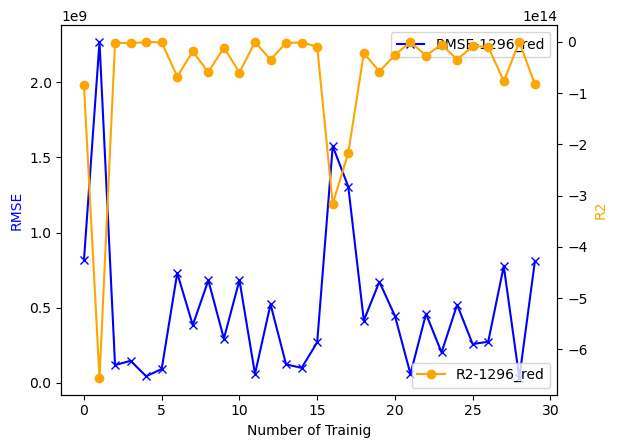

In [83]:
## Grid Sampling 1296 with testing with reduced datasets
fig, ax1 = plt.subplots()
ax1.plot(RMSEs1296_red, '-x', color='blue', label='RMSE-1296_red')
ax1.set_xlabel('Number of Trainig')
ax1.set_ylabel('RMSE', color='blue')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(R2s1296_red, '-o', color='orange', label='R2-1296_red')
ax2.set_ylabel('R2', color='orange')
plt.legend()

plt.show()
fig.savefig('GRID1296-Training_with_different_randomseeds_for_data_splits_and_reduced_testdataset.png')

## means of RMSD and R2

In [84]:
## Grid Sample 1296
print(f'GRID SAMPLE 1296')
print(f'avg. RMSE: {np.mean(RMSEs1296_red)}')
print(f'Std Dev: {np.std(RMSEs1296_red)}')
#print(f'Variance: {np.var(RMSEs1296)}')
print(f'avg. R2: {np.mean(R2s1296_red)}')
print(f'Std Dev: {np.std(R2s1296_red)}')
#print(f'Variance: {np.var(R2s1296)}')

GRID SAMPLE 1296
avg. RMSE: 504640491.1958159
Std Dev: 490761144.8794547
avg. R2: -63153216202634.18
Std Dev: 128799717790514.94


## Result
it's not only the extrapolation that is bad, it's also the interpolation !?

check results for massive outliers and maybe remove them?

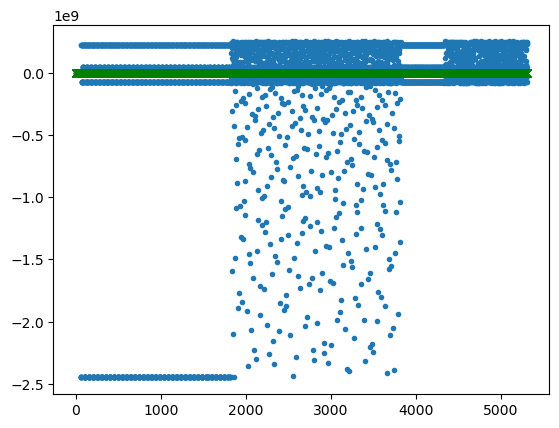

In [91]:
for i in range(0, len(Y_PREDICTIONs1296_red)):
    #print(f'{i}')
    #print(f'{Y_PREDICTIONs1296_red[i]}')
    
    #plt.plot(Y_PREDICTIONs1296_red[i], '.')
    plt.plot(np.sort(Y_PREDICTIONs1296_red[i].ort(), '.')
    #plt.plot(Y_test, 'x', color='green')
    #plt.show()
   
    break
    

This model does not perform well overall, it's not just the extrapolation